In [1]:
import numpy as np
import pandas as pd
import nltk
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import os
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline

In [6]:
#news and blog dataframes loaded
news_df = pd.read_pickle("./final_total_news.pkl") #9881
blogs_df = pd.read_pickle("./final_total_blogs.pkl") #3580

In [38]:
#Get news and blog content

def get_content(df):
    # content=[]
    for index,row in df.iterrows():
        content.append(row.content)
    return content
news=[]
blog=[]
contents=[news,blog]
dfs=[news_df,blogs_df]
for df, content in zip(dfs,contents):
    content=get_content(df)
    print(len(content))
    
#print(len(blog_content),len(news_content)) #=>3580 9881

9881
3580


In [40]:
print(len(blog),len(news)) #=>3580 9881

3580 9881


In [164]:
#Prepare the stop_words_list
from sklearn.feature_extraction import stop_words
stop_list = list(stop_words.ENGLISH_STOP_WORDS)
stop_list.extend(['like','looking','september','monday','tuesday','wednesday','thursday','friday','saturday','sunday','including','old','vs','ie','industry','statements','net','entirely','track','according','mr','department','new','time','src', 'module','include','miles','series','read','just','know','people','know','way','really','make','want','ve','things','think','need','going','little','ll','look','got','thing','feel','does','year','day','said','new','just','years','big','st','news','did','told','reached','shall','window','tab','caption','id','align','com','http','www','https','said','based','percent','used','use','et al','pp','et al','ss','exp','ft','pf','src','prnewswire','newswire','visit','view','source','click'])

In [165]:
#### VECTORIZE NEWS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 3),  
                                   stop_words=stop_list, 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   min_df=2,
                                   max_df = 0.8)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3),  
                                   stop_words=stop_list, 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   min_df=2,
                                   max_df = 0.8)

In [53]:
#### Vectorize NEWS
cv_news = count_vectorizer.fit_transform(news)
tfidf_news = tfidf_vectorizer.fit_transform(news)
#terms is just a list of the features used in the tf-idf matrix
terms_news = tfidf_vectorizer.get_feature_names()

In [42]:
#### Vectorize BLOGS
cv_blogs = count_vectorizer.fit_transform(blog)
tfidf_blogs = tfidf_vectorizer.fit_transform(blog)
#terms is just a list of the features used in the tf-idf matrix
terms_blogs = tfidf_vectorizer.get_feature_names()

In [54]:
print("CV-news:", cv_news.shape)
print("TFIDF-news:", tfidf_news.shape)
print("TFIDF-news-terms(first 15):", terms_news[:15])
print("--------------")
print("CV-blog:", cv_blogs.shape)
print("TFIDF-blog:", tfidf_blogs.shape)
print("TFIDF-blog-terms(first 15):", terms_blogs[:15])

CV-news: (9881, 275102)
TFIDF-news: (9881, 275102)
TFIDF-news-terms(first 15): ['aa', 'aaa', 'aaas', 'aaas eurekalert', 'aaas eurekalert responsible', 'aac', 'aadmi', 'aadmi party', 'aadmi party aap', 'aai', 'aal', 'aalen', 'aalen aarau', 'aalen aarau abc', 'aaliyah']
--------------
CV-blog: (3580, 63022)
TFIDF-blog: (3580, 63022)
TFIDF-blog-terms(first 15): ['aa', 'aa battery', 'aaa', 'aap', 'aaron', 'aas', 'ab', 'ababa', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abba', 'abbas', 'abbasi']


In [55]:

from sklearn.decomposition import NMF, TruncatedSVD

n_comp = 50

lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

#### DIMENSIONALITY REDUCTION FOR NEWS

lsa_tfidf_news = lsa_tfidf.fit_transform(tfidf_news)
lsa_cv_news = lsa_cv.fit_transform(cv_news)
nmf_cv_news = nmf_cv.fit_transform(cv_news)
#terms is just a list of the features used in the tf-idf matrix
#terms_news = tfidf_vectorizer.get_feature_names()


In [51]:
#### DIMENSIONALITY REDUCTION FOR BLOGS

lsa_tfidf_blogs = lsa_tfidf.fit_transform(tfidf_blogs)
lsa_cv_blogs = lsa_cv.fit_transform(cv_blogs)
nmf_cv_blogs = nmf_cv.fit_transform(cv_blogs)
#terms is just a list of the features used in the tf-idf matrix
#terms_blogs = tfidf_vectorizer.get_feature_names()

In [60]:
from sklearn.cluster import KMeans

In [87]:
#reduced dimensions
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(lsa_tfidf_news)
clusters = km.labels_.tolist()

In [88]:
news_df['cluster'] = clusters

In [89]:
news_df['cluster'].value_counts()

2    6160
1    1525
9     987
6     522
3     337
5     174
0      85
8      49
4      23
7      19
Name: cluster, dtype: int64

In [90]:
news_df.head(2)

,content,media-type,source,title,Date,Time,Timestamp,cluster
1,VETERANS saluted Worcester's first ever breakf...,News,Redditch Advertiser,Worcester breakfast club for veterans gives hu...,2015-09-07,10:16:14,2015-09-07 10:16:14,2
2,New Product Gives Marketers Access to Real Key...,News,Virtualization Conference & Expo,Jumpshot Gives Marketers Renewed Visibility In...,2015-09-17,15:00:00,2015-09-17 15:00:00,1


In [85]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_news)

Hierarchical document clustering


Ward clustering algorithm  offers hierarchical clustering. Ward clustering is an agglomerative clustering method, meaning that at each stage, the pair of clusters with minimum between-cluster distance are merged. I used the precomputed cosine distance matrix (dist) to calclate a linkage_matrix which I plot as a dendrogram.

In [96]:
#Check how dissimilar Yahoo! News is in India and Australia
yahoo_India =news_df[news_df['source']=='Yahoo! India']
yahoo_Australia =news_df[news_df['source']=='Yahoo! News Australia']

In [99]:
yahoo_I=[]
yahoo_A=[]
contents=[yahoo_I,yahoo_A]
dfs=[yahoo_India,yahoo_Australia]
for df, content in zip(dfs,contents):
    content=get_content(df)
    print(len(content))

36
37
36


pandas.core.series.Series

In [167]:
tfidf_yahoo_I = tfidf_vectorizer.fit_transform(yahoo_I)
#tfidf_yahoo_A = tfidf_vectorizer_australia.fit_transform(yahoo_A)
titles_I = list(yahoo_India['title'])
titles_A = yahoo_Australia['title']

In [168]:
titles_I = titles_I.tolist()
titles_A = titles_A.tolist()

AttributeError: 'list' object has no attribute 'tolist'

In [1]:
#Damien's suggestions

* Lemmatize/ Porterize
* Vectorize
* Dimensionally reduce (LSA/NMF/LDA)
* Do similarity check on topic vectors (not word vectors)
* Cluster / make dendogram

* Word2vec
* Dimensional reduce
* Do similarity check on topic vectors
* Cluster / make dendogram



In [170]:
from sklearn.metrics.pairwise import cosine_similarity
dist_I = 1 - cosine_similarity(tfidf_yahoo_I)
dist_A = 1 - cosine_similarity(tfidf_yahoo_A)

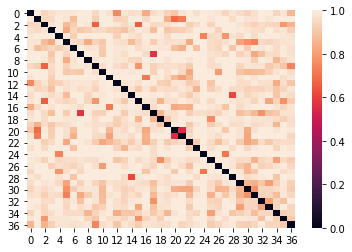

In [171]:
sns.heatmap(dist_A)

In [172]:
#YAHOO! INDIA
from scipy.cluster.hierarchy import ward, dendrogram,linkage

linkage_matrix = ward(dist_I) #define the linkage_matrix using ward clustering pre-computed distances

# fig, ax = plt.subplots(figsize=(15, 20)) # set size
# ax = dendrogram(linkage_matrix, orientation="right", labels=titles_I);

# plt.tick_params(axis= 'x', which='both',bottom='off', top='off',labelbottom='off')

# plt.tight_layout() #show plot with tight layout

# #uncomment below to save figure
# #plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

A dendrogram is a visualization in form of a tree showing the order and distances of merges during the hierarchical clustering.

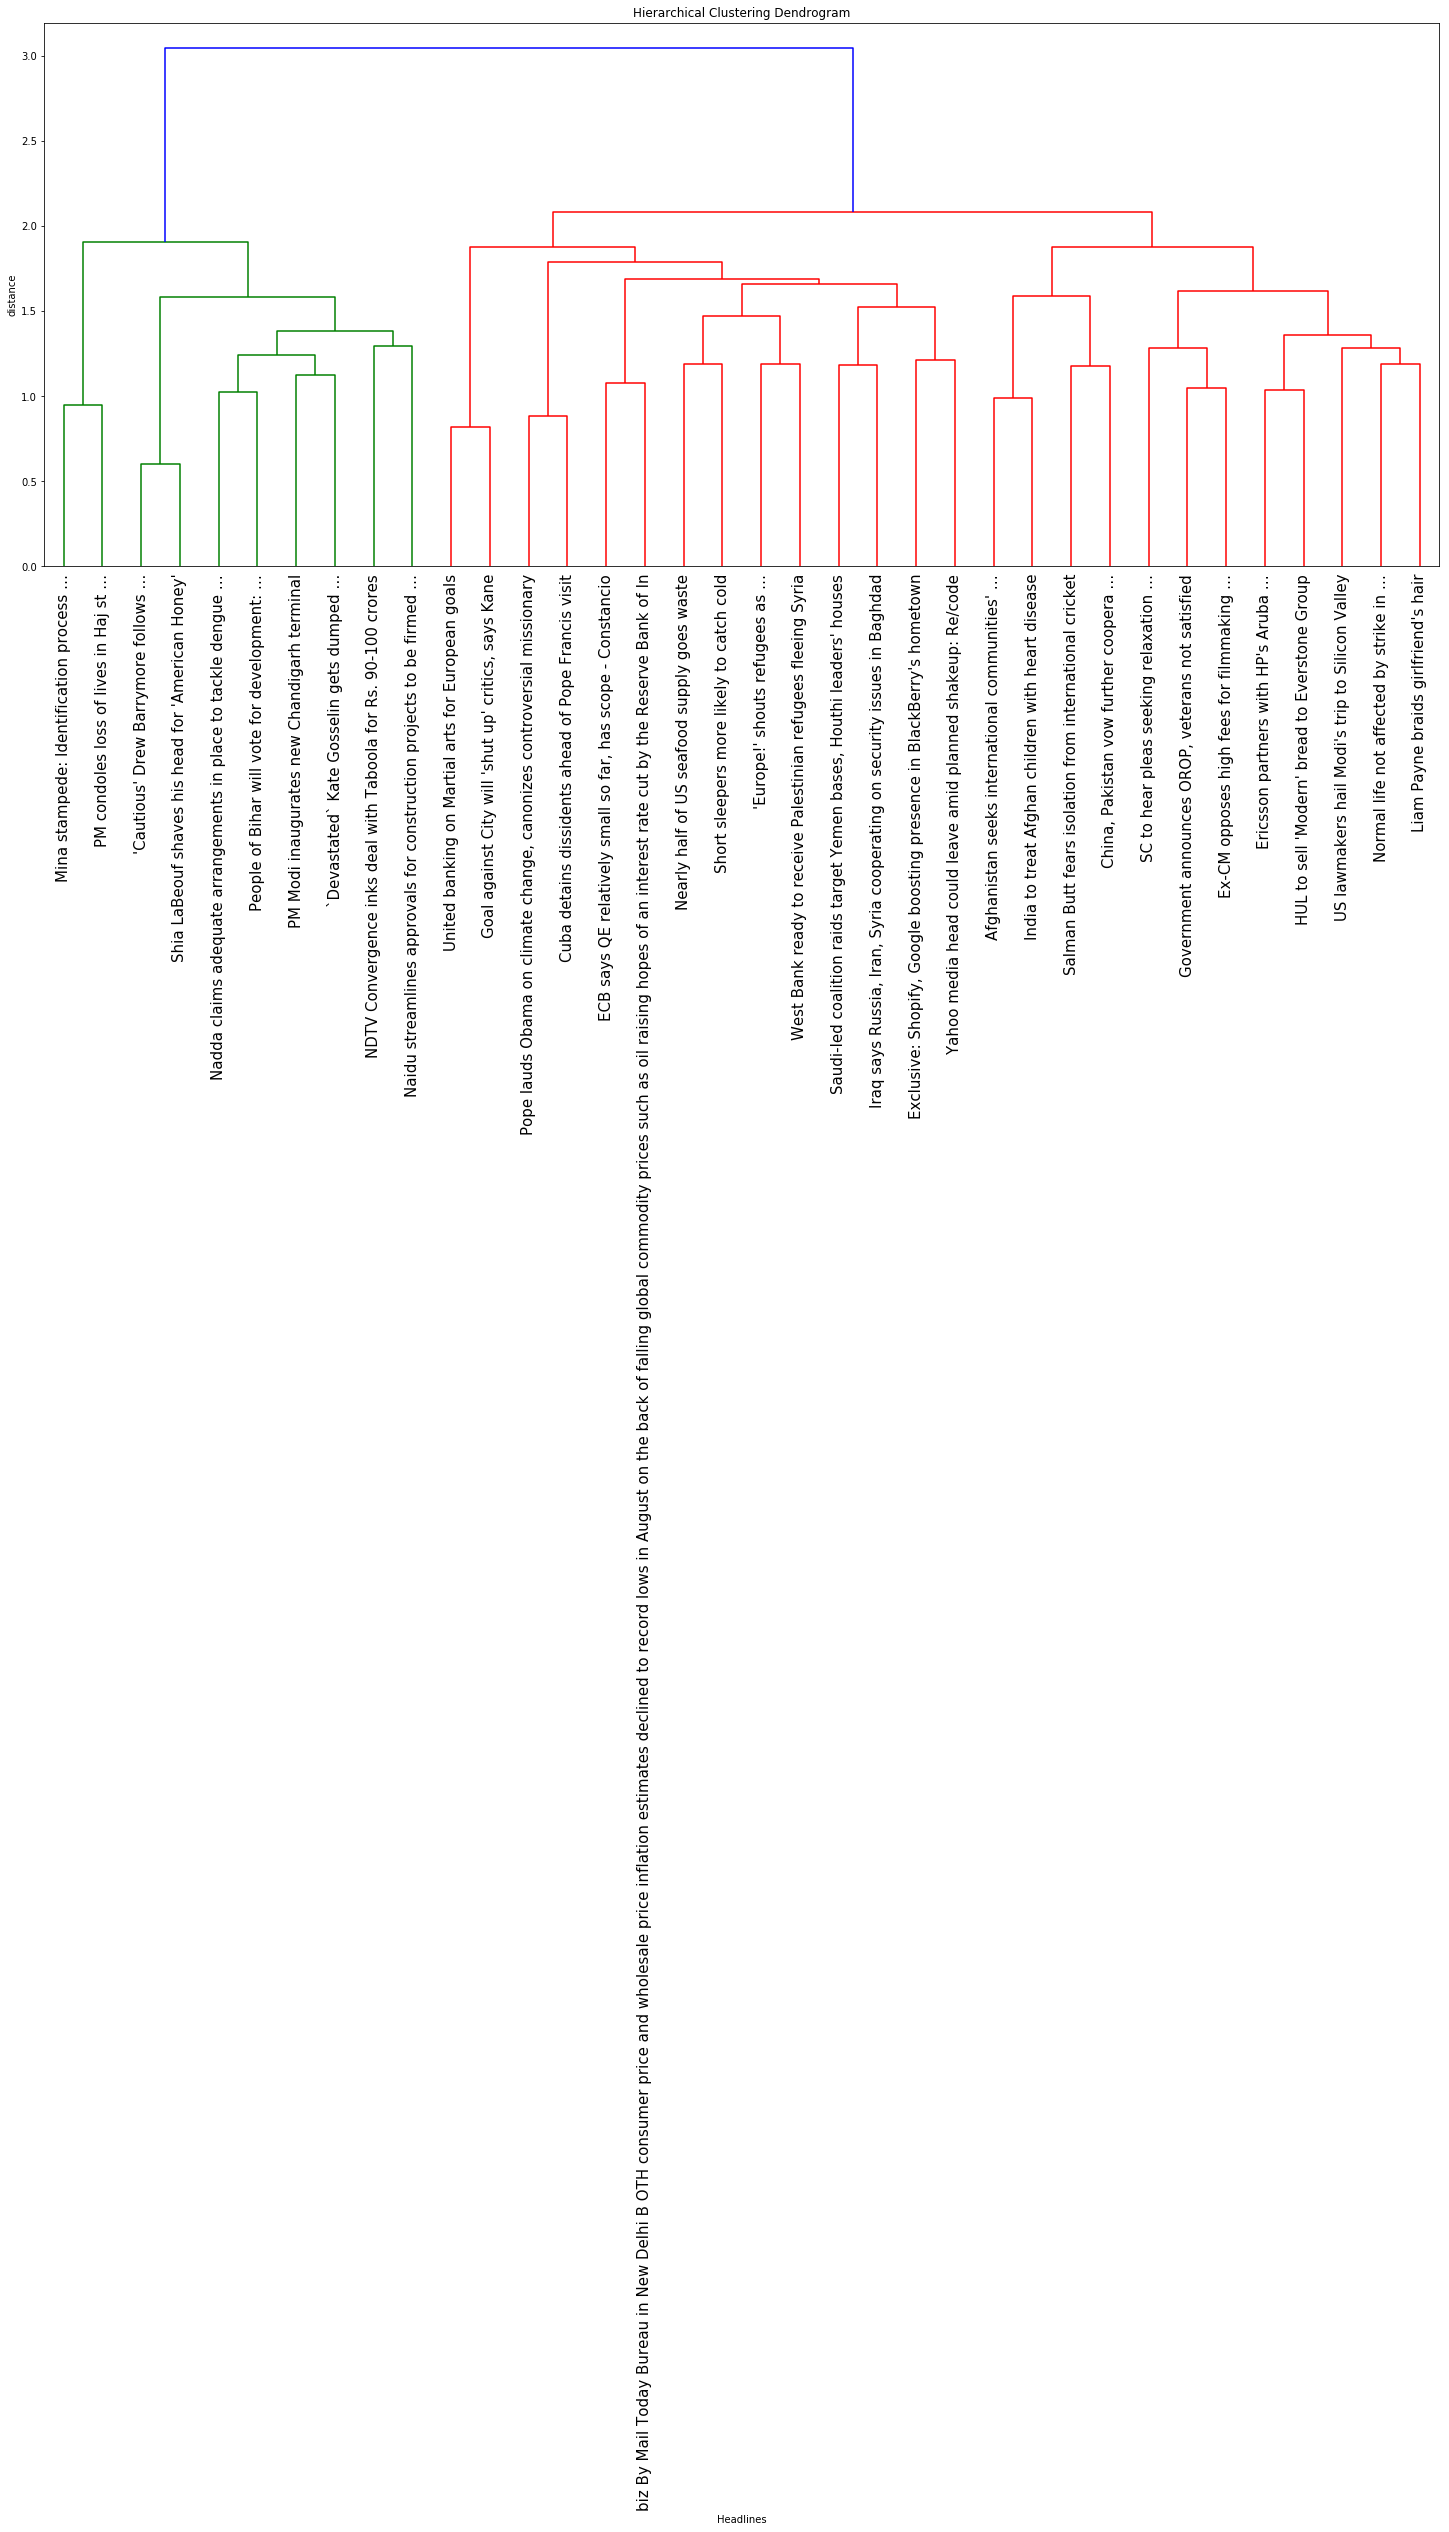

In [173]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Headlines')
plt.ylabel('distance')
dendrogram(
    linkage_matrix,
    labels=titles_I,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15,  # font size for the x axis labels
)
plt.show()

In [139]:
from sklearn.metrics.pairwise import manhattan_distances
dist_I =  manhattan_distances(tfidf_yahoo_I)

In [140]:
linkage_matrix = ward(dist_I) #define the linkage_matrix using ward clustering pre-computed distances

/Users/codess/anaconda/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


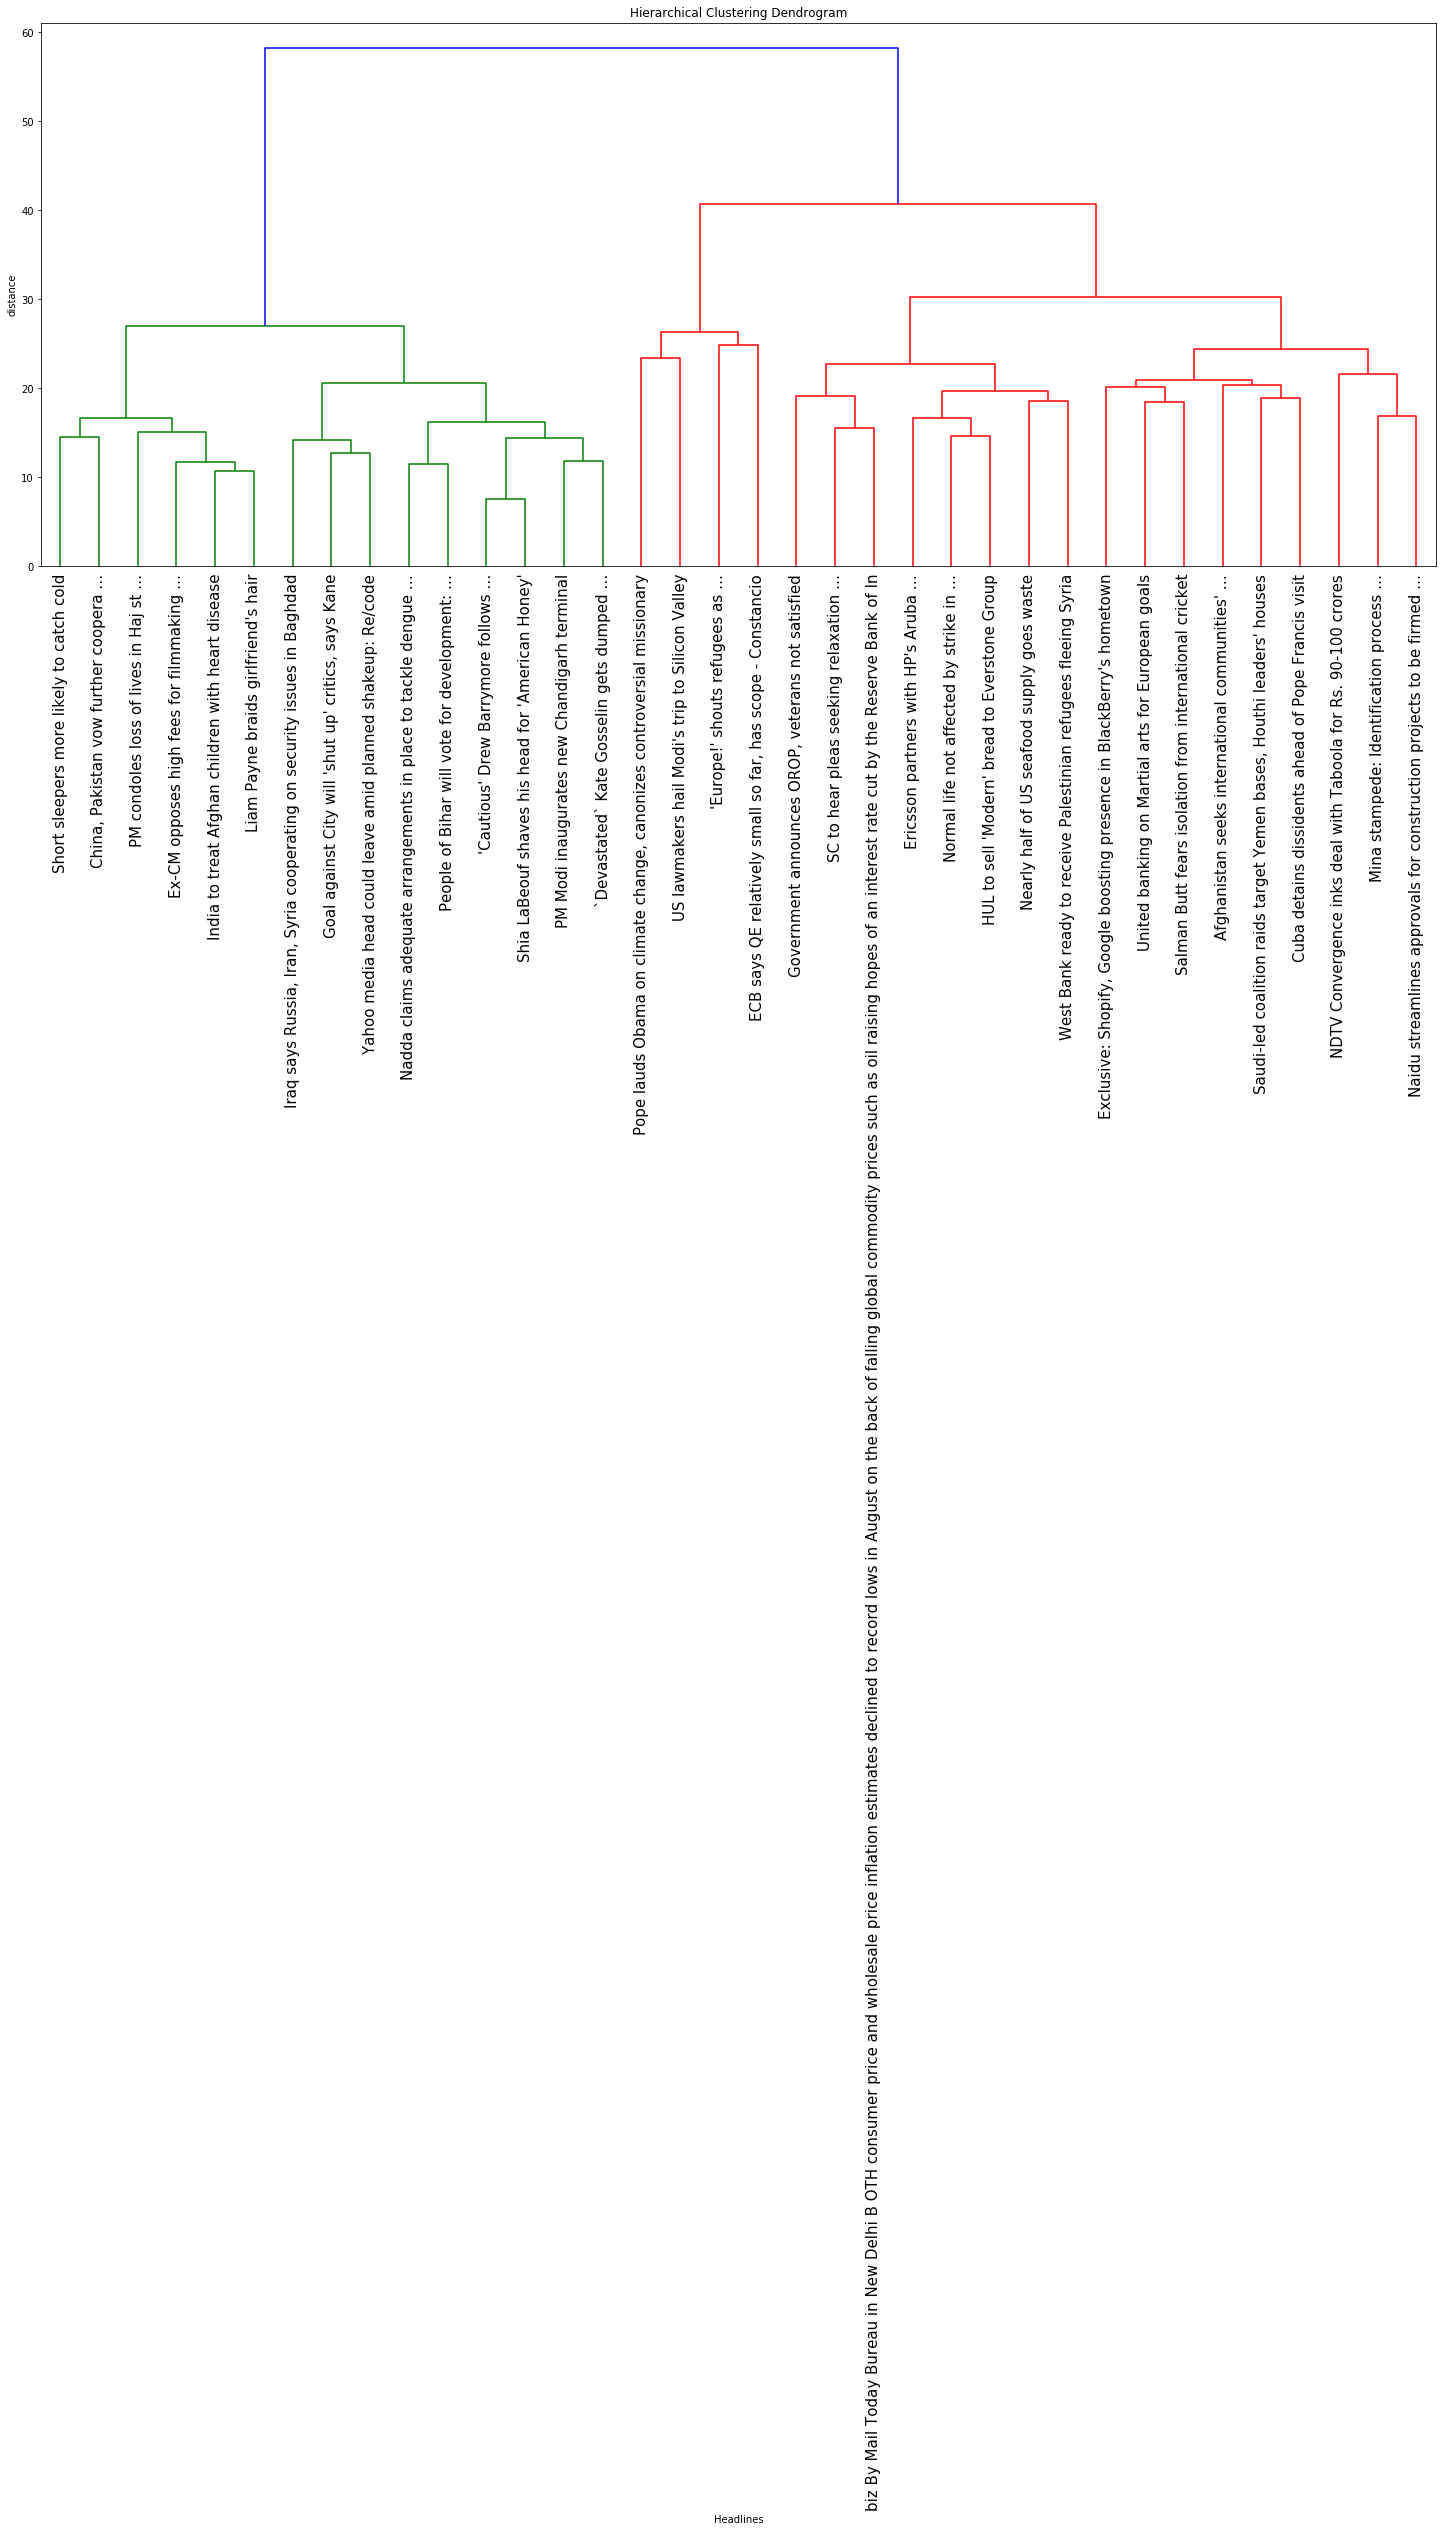

In [141]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Headlines')
plt.ylabel('distance')
dendrogram(
    linkage_matrix,
    labels=titles_I,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15,  # font size for the x axis labels
)
plt.show()

In [142]:
dist = 1 - cosine_similarity(tfidf_yahoo_I)

In [144]:
from scipy.cluster.hierarchy import single
linkage_matrix = single(dist_I) 

/Users/codess/anaconda/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:272: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='single', metric='euclidean')


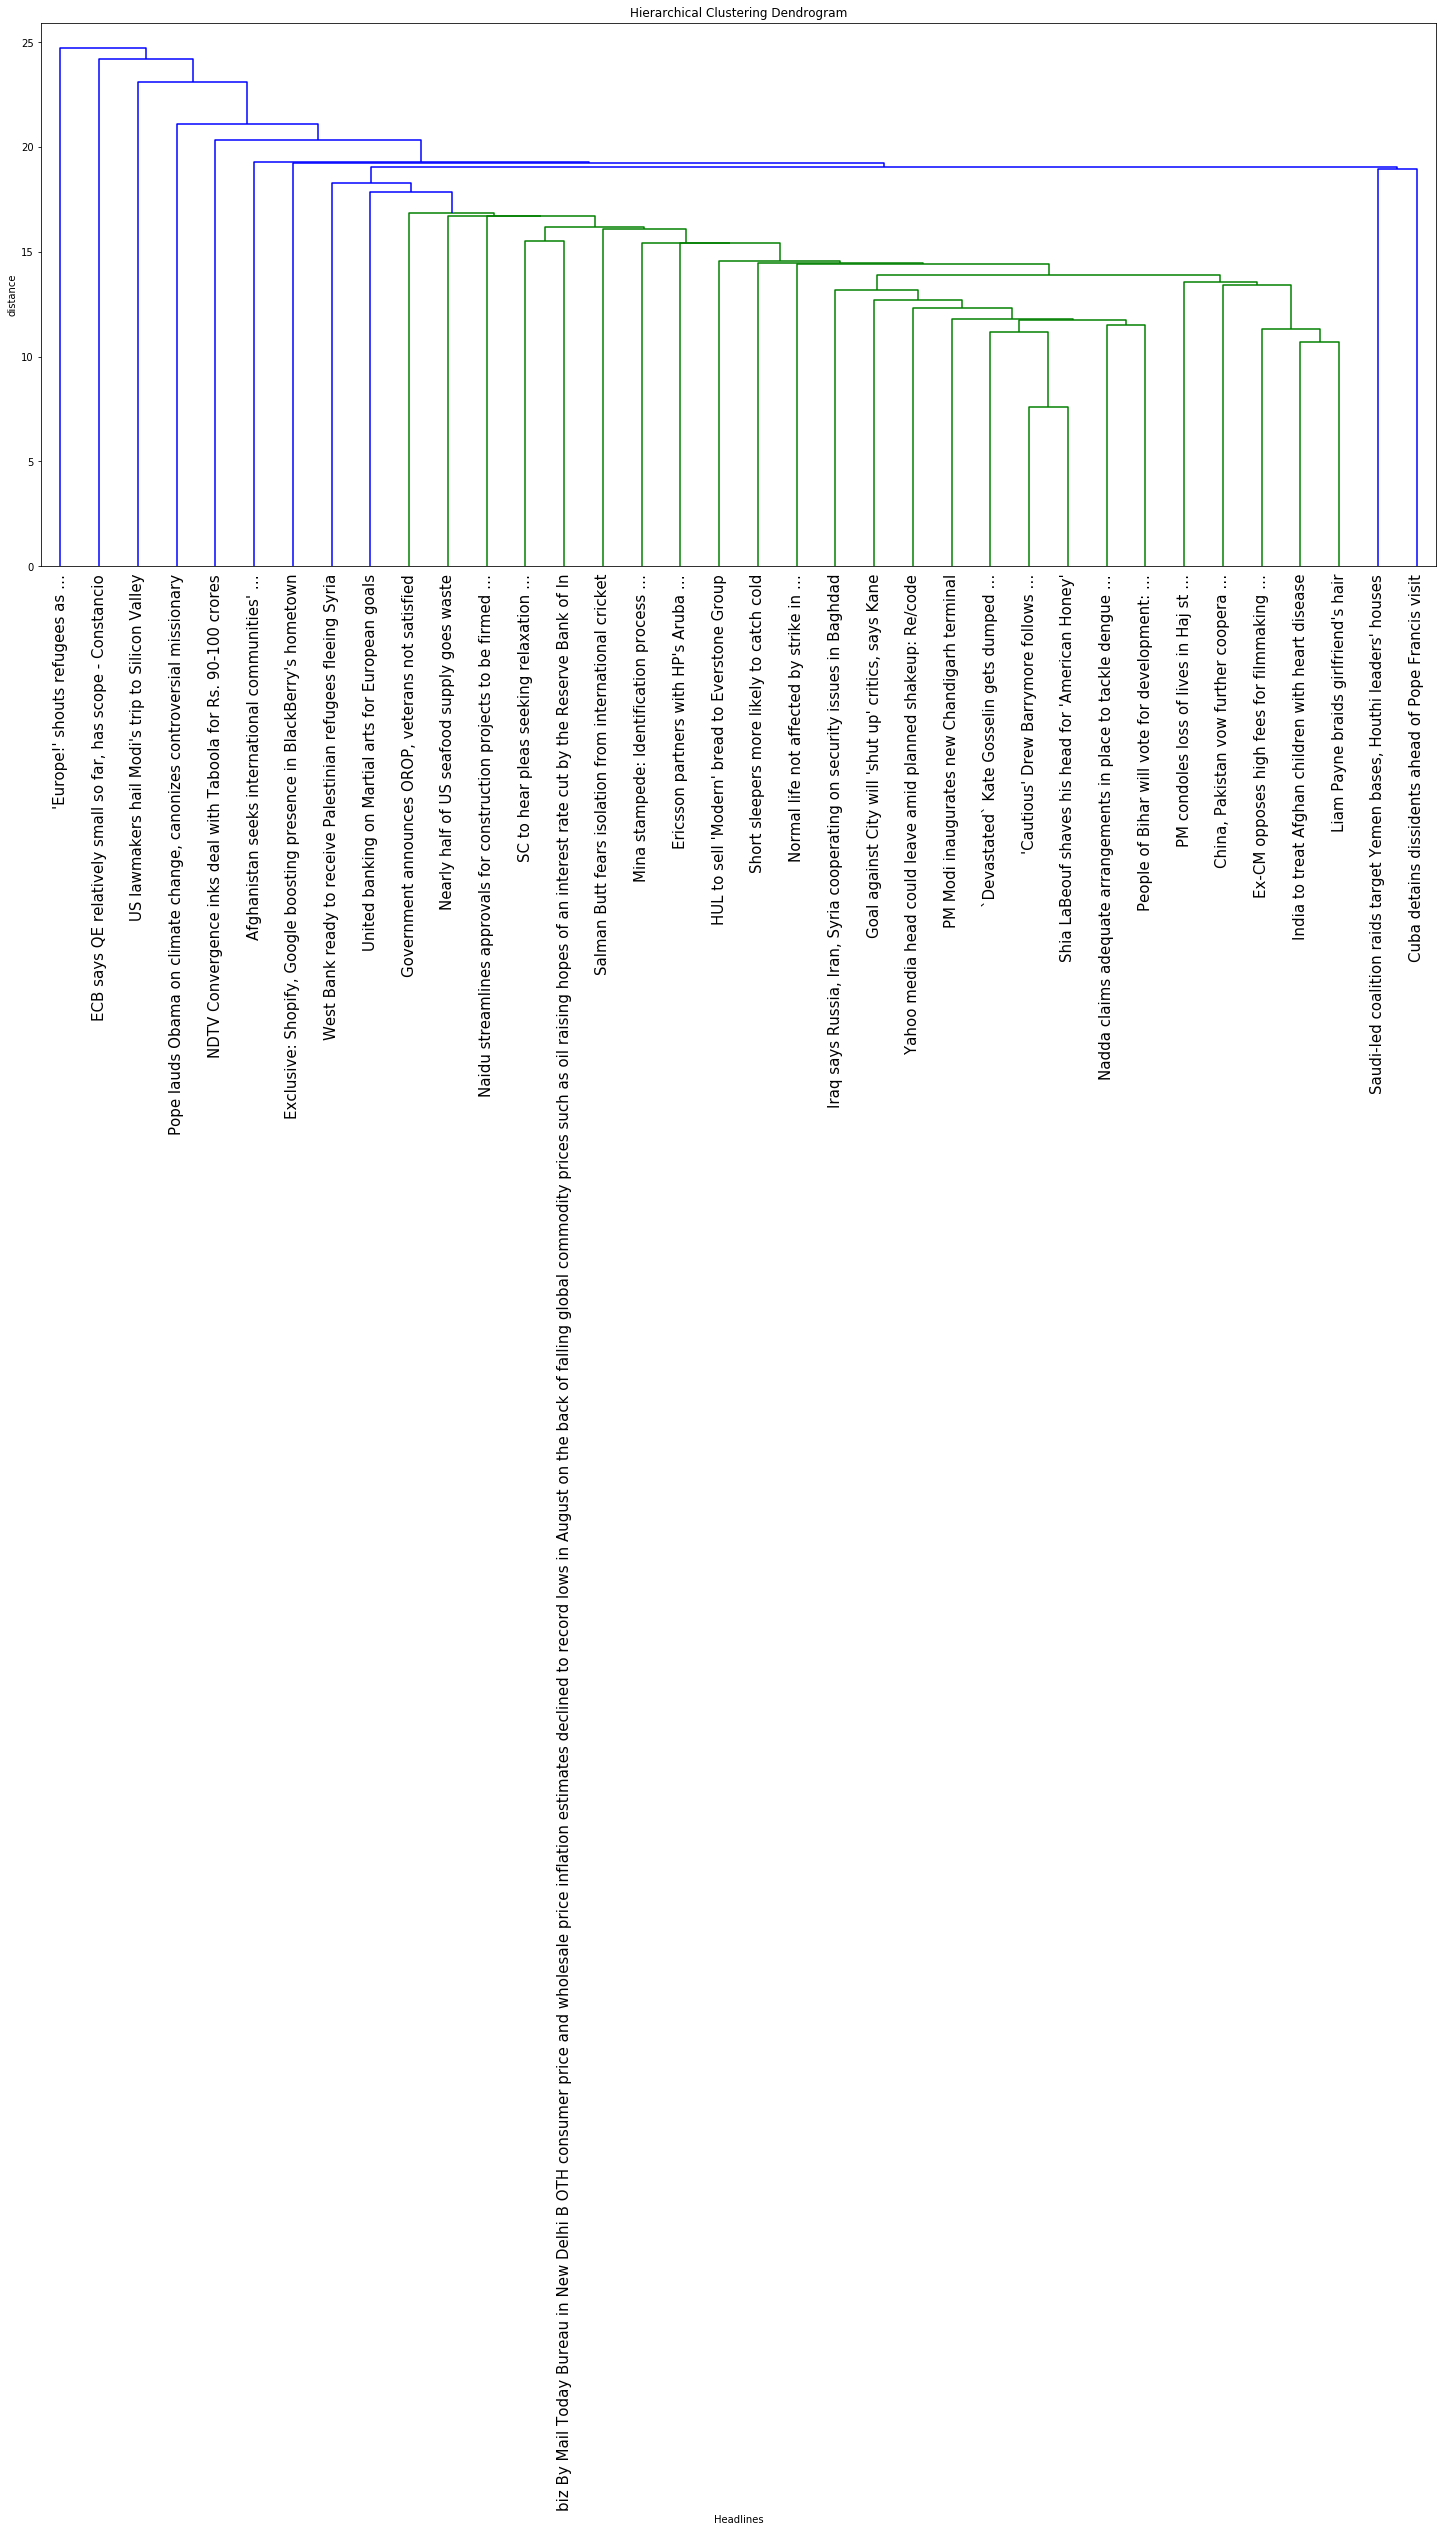

In [145]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Headlines')
plt.ylabel('distance')
dendrogram(
    linkage_matrix,
    labels=titles_I,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15,  # font size for the x axis labels
)
plt.show()

In [147]:
from scipy.cluster.hierarchy import average
linkage_matrix = average(dist_I) 

/Users/codess/anaconda/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:323: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


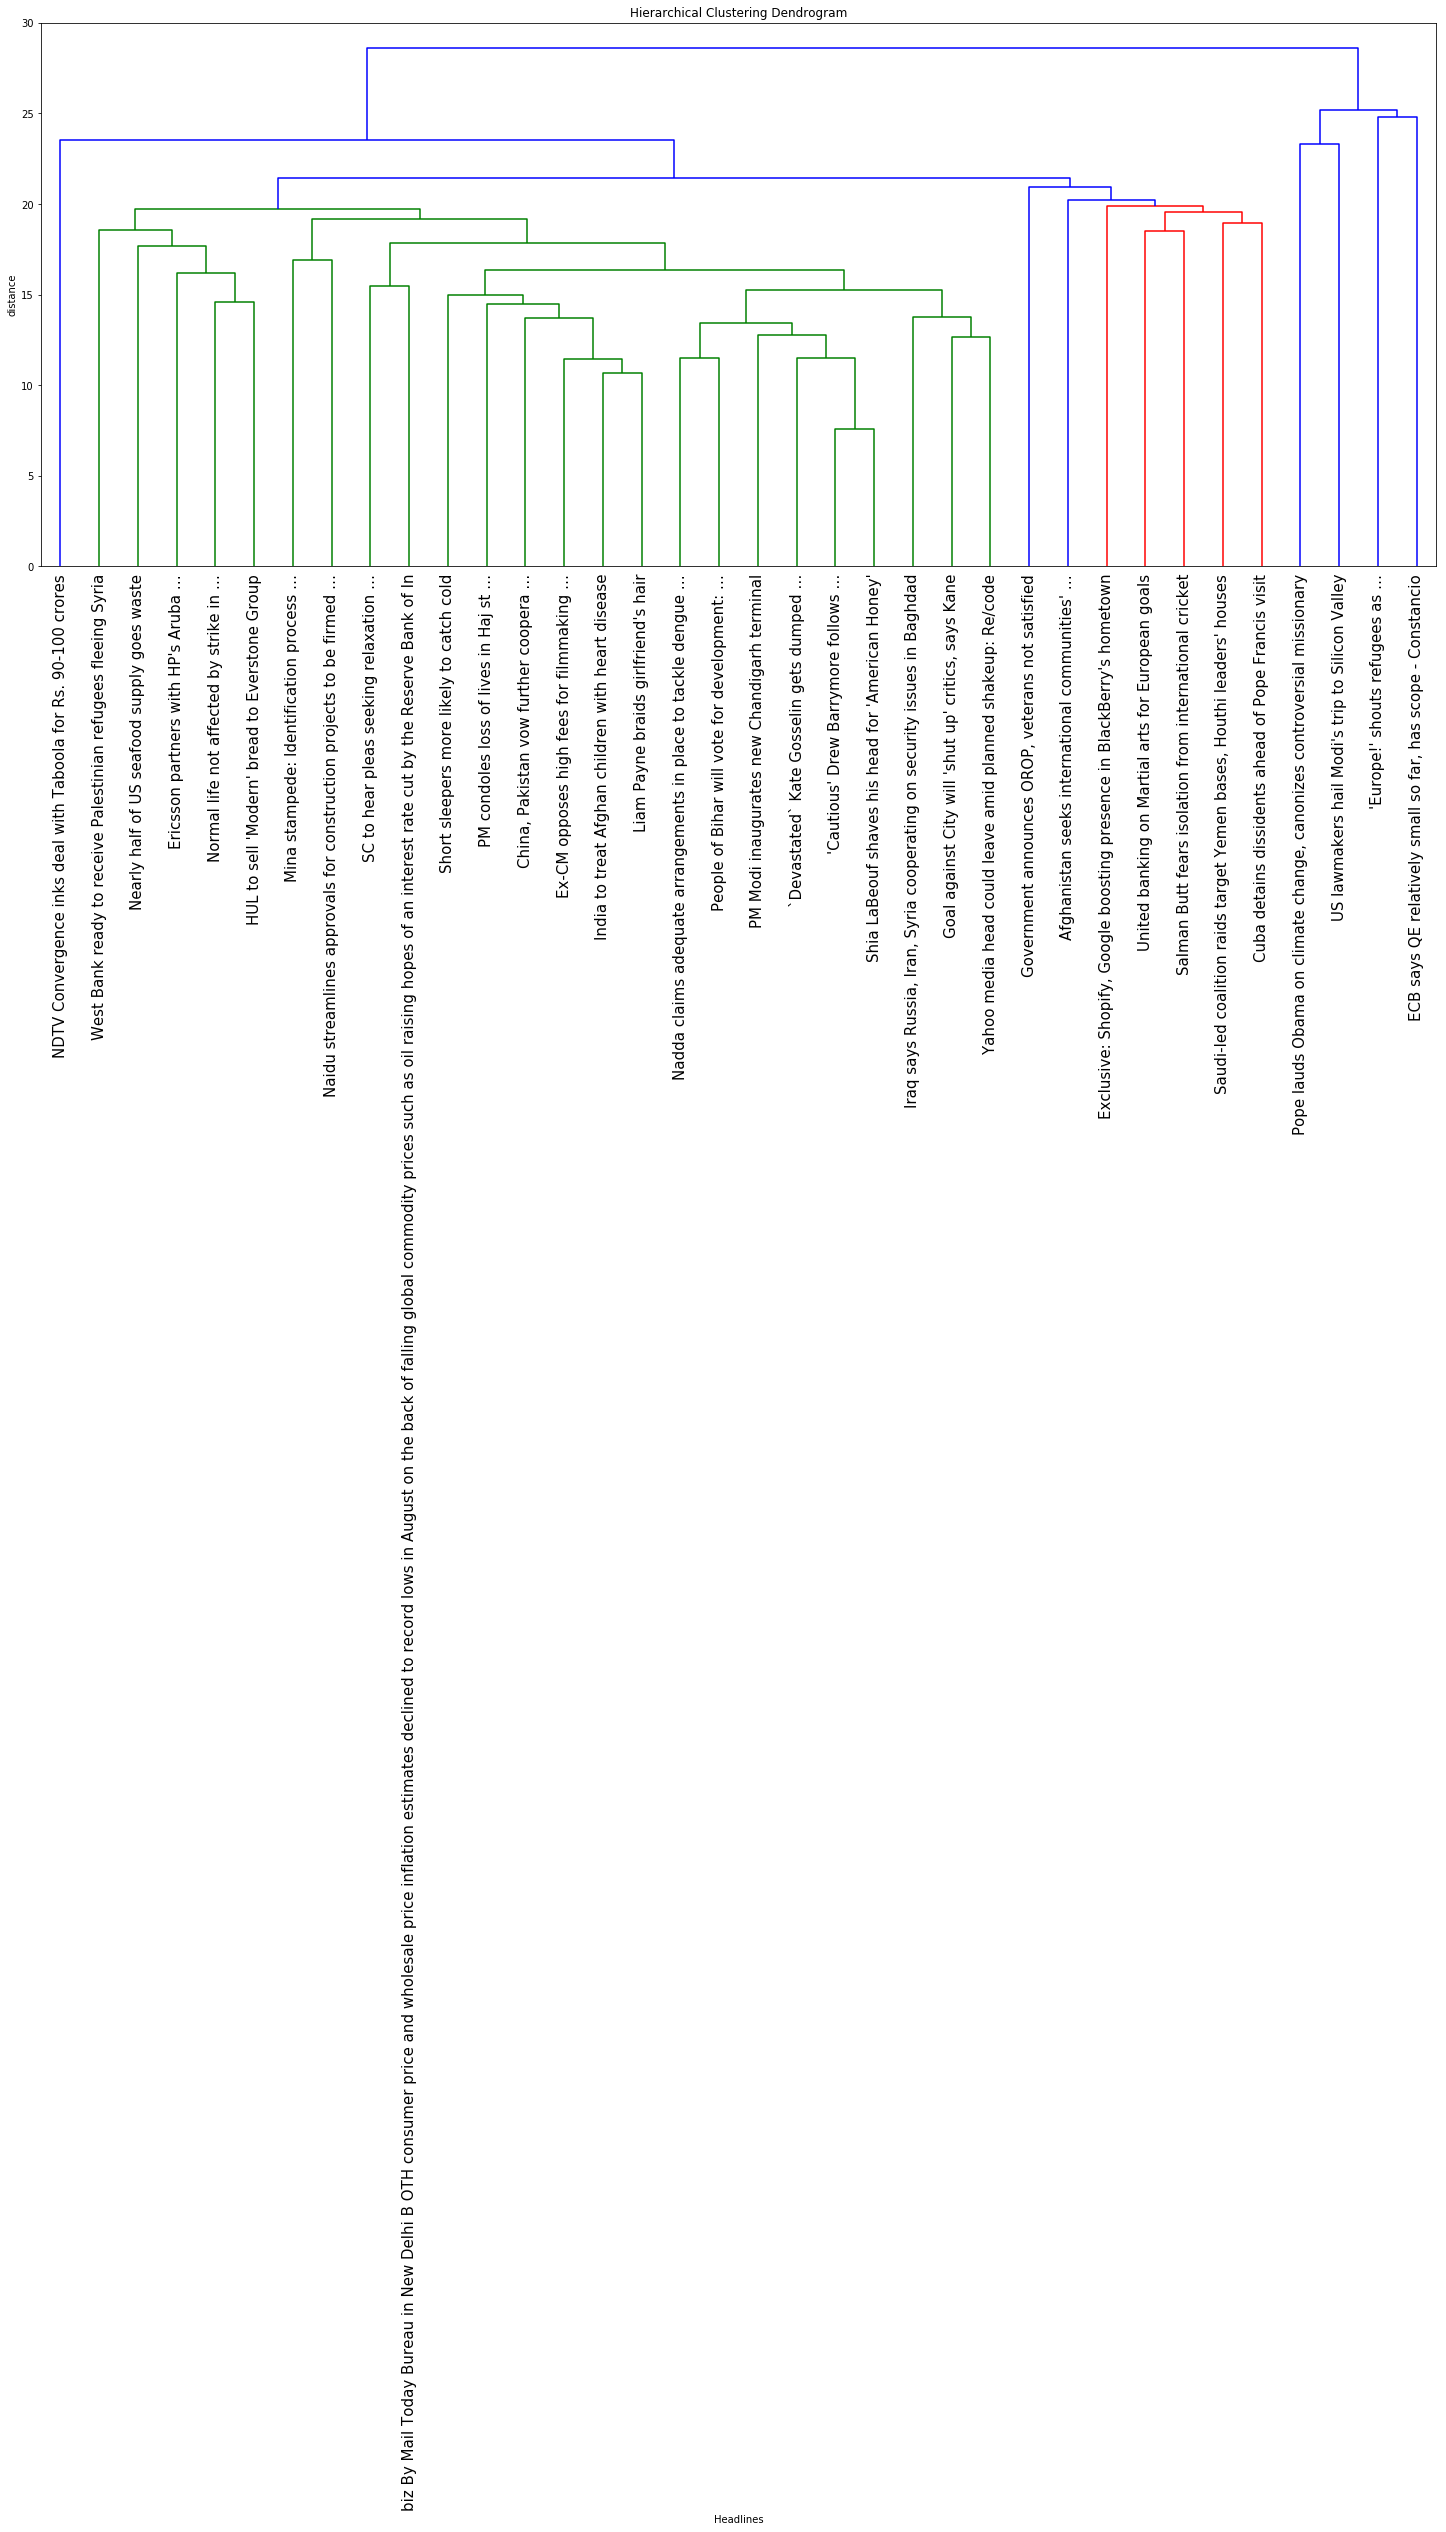

In [148]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Headlines')
plt.ylabel('distance')
dendrogram(
    linkage_matrix,
    labels=titles_I,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15,  # font size for the x axis labels
)
plt.show()

In [149]:
from scipy.cluster.hierarchy import weighted
linkage_matrix = weighted(dist_I) 

/Users/codess/anaconda/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:351: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='weighted', metric='euclidean')


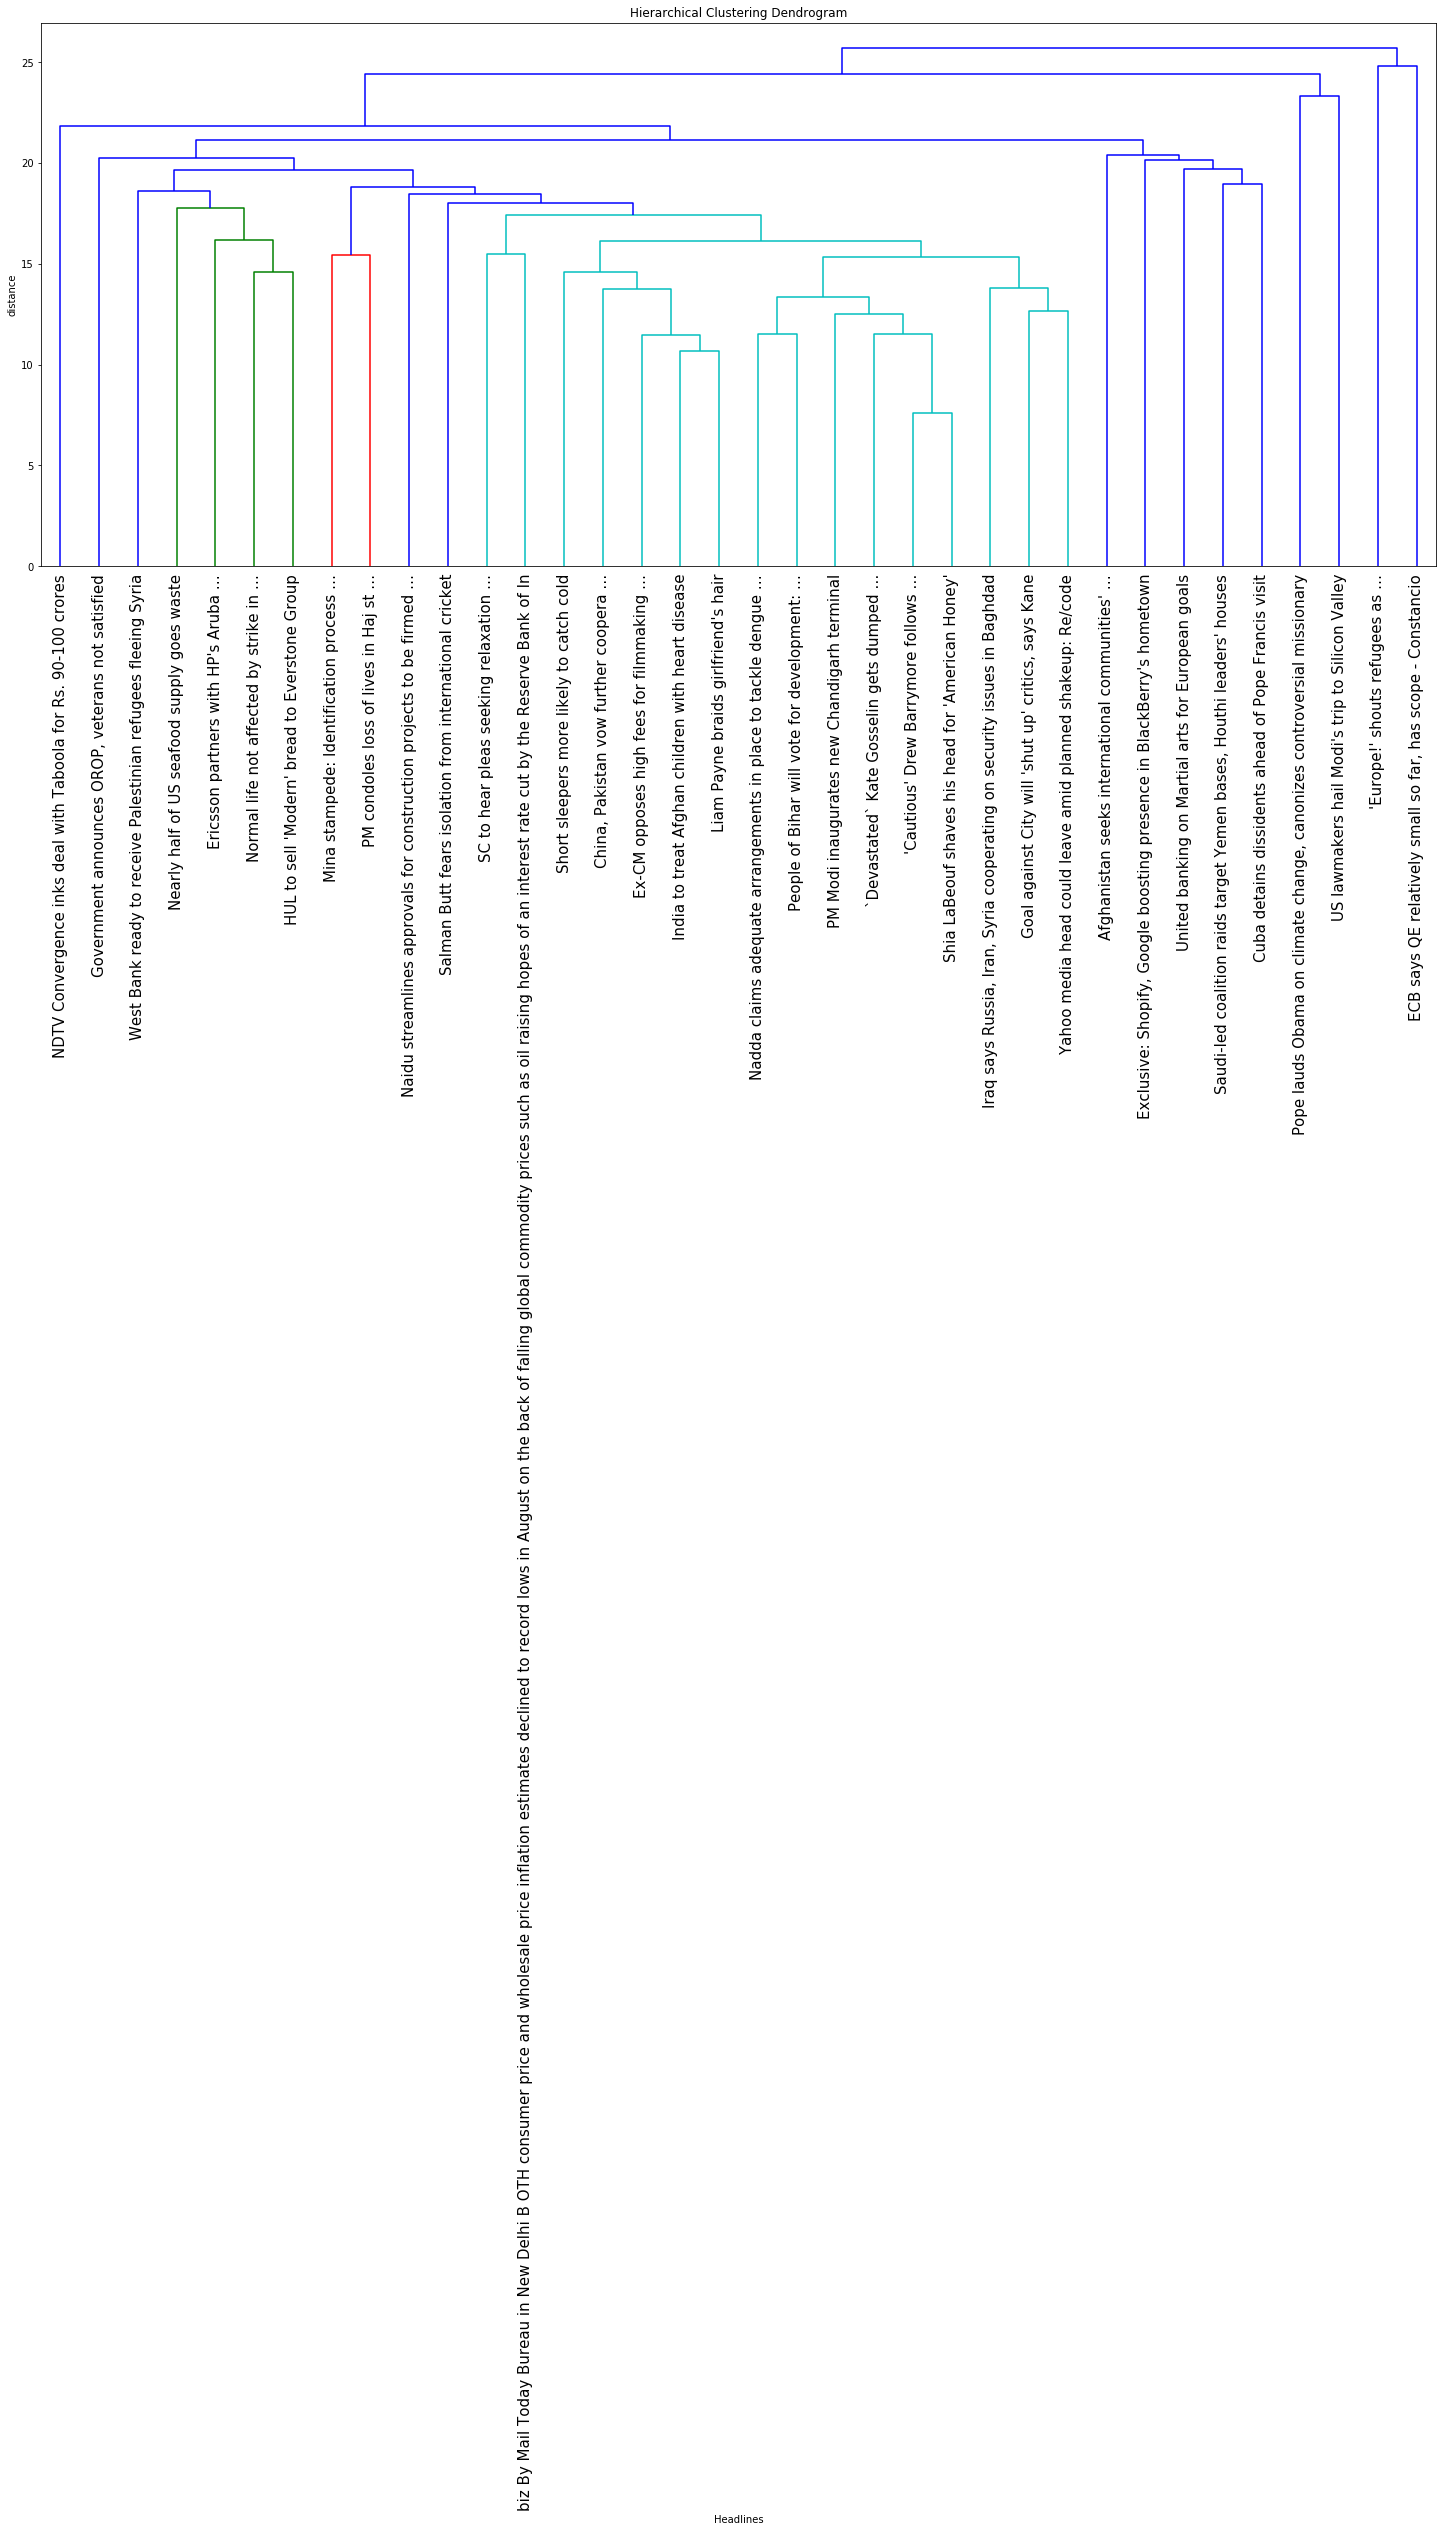

In [150]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Headlines')
plt.ylabel('distance')
dendrogram(
    linkage_matrix,
    labels=titles_I,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15,  # font size for the x axis labels
)
plt.show()

In [151]:
from scipy.cluster.hierarchy import centroid
linkage_matrix = centroid(dist_I) 

/Users/codess/anaconda/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:395: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='centroid', metric='euclidean')


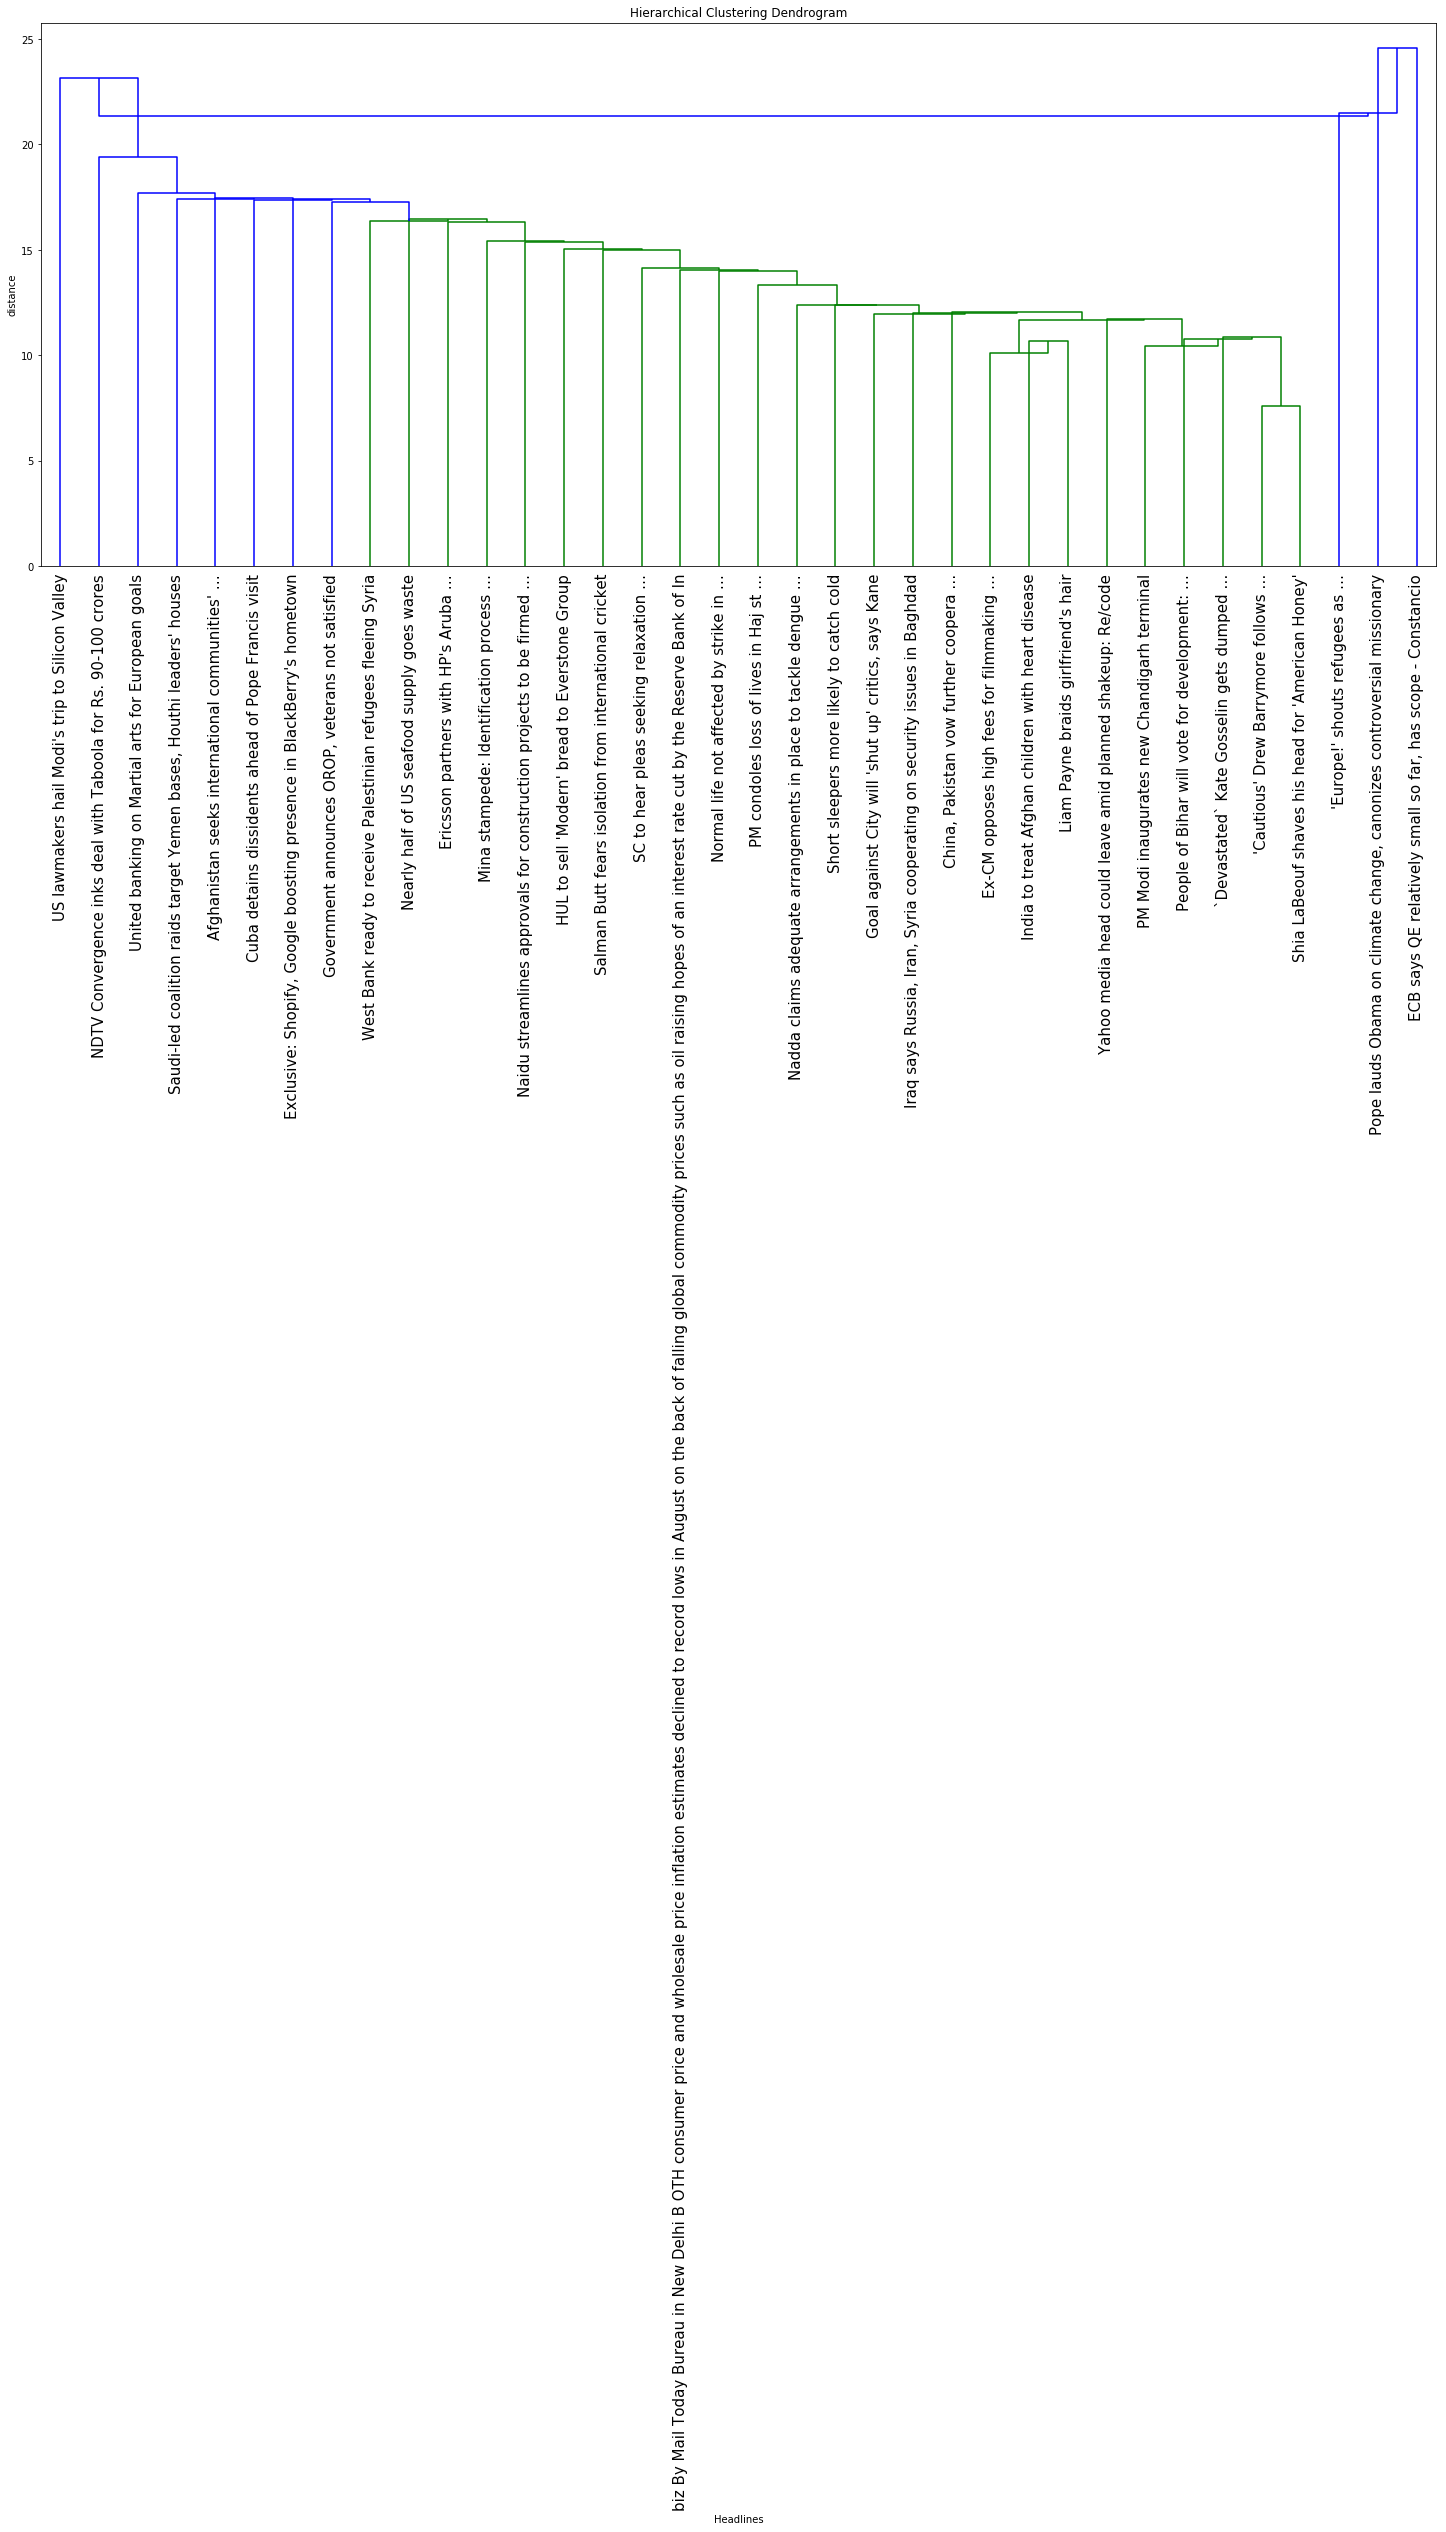

In [152]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Headlines')
plt.ylabel('distance')
dendrogram(
    linkage_matrix,
    labels=titles_I,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15,  # font size for the x axis labels
)
plt.show()

In [153]:
from scipy.cluster.hierarchy import median
linkage_matrix = median(dist_I) 

/Users/codess/anaconda/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:440: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='median', metric='euclidean')


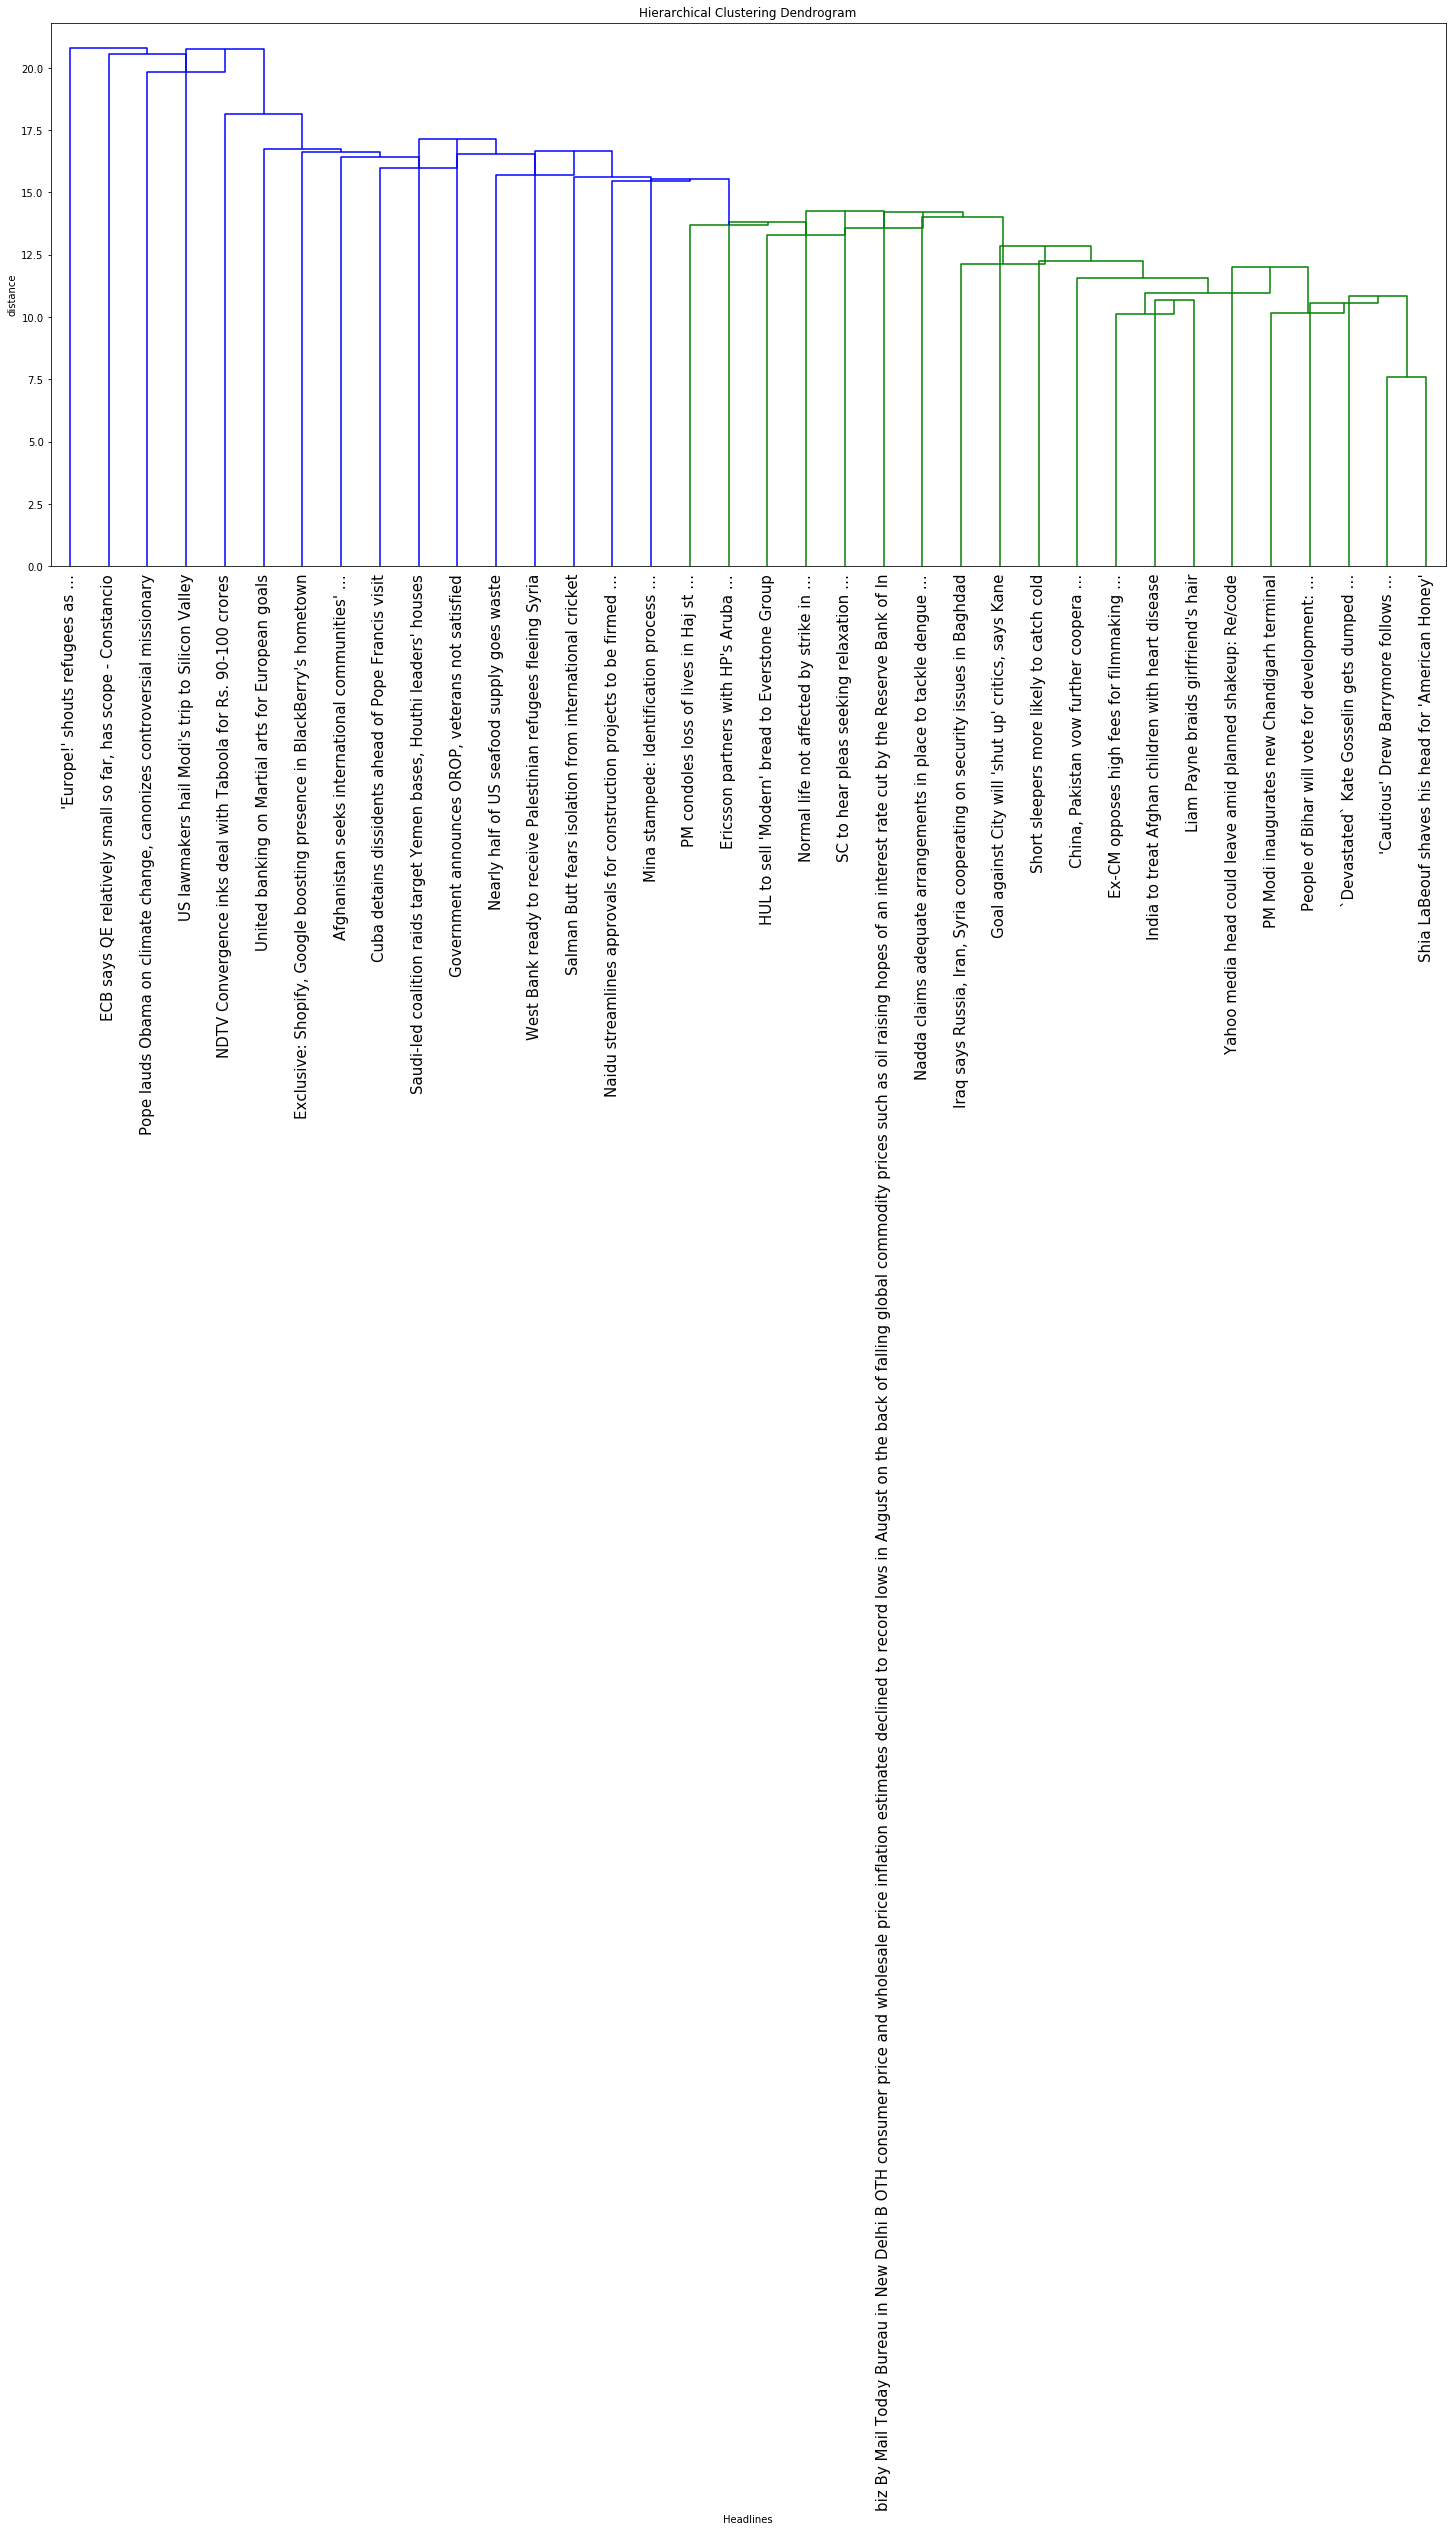

In [154]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Headlines')
plt.ylabel('distance')
dendrogram(
    linkage_matrix,
    labels=titles_I,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15,  # font size for the x axis labels
)
plt.show()